In [1]:
%reset -fs

import pandas as pd
import numpy as np
from sklearn import metrics

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns


matplotlib.use('TkAgg')
%matplotlib inline
# pd.set_option('max_columns', 100)
pd.set_option("display.max_colwidth", 1)

In [2]:
df = pd.read_csv('tweets_01-08-2021.csv', encoding='utf-8')

In [3]:
len(df)

56571

In [4]:
df.head(30)

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,Republicans and Democrats have both created our economic problems.,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,"I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! #KAG2020 https://t.co/dNJZfRsl9y",f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance court obtained by CBS News questions where there will be further disciplinary action and cho…,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,"The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know it. Almost all recent elections using this system, even though much smaller &amp; with far fewer Ballots to count, have ended up being a disaster. Large numbers of missing Ballots &amp; Fraud!",f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,RT @MZHemingway: Very friendly telling of events here about Comey's apparent leaking to compliant media. If you read those articles and tho…,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
5,1217962723234983937,RT @WhiteHouse: President @realDonaldTrump announced historic steps to protect the Constitutional right to pray in public schools! https://…,t,f,Twitter for iPhone,0,25048,2020-01-17 00:11:56,f
6,1223640662689689602,Getting a little exercise this morning! https://t.co/fyAAcbhbgk,f,f,Twitter for iPhone,285863,30209,2020-02-01 16:14:02,f
7,1319501865625784320,https://t.co/4qwCKQOiOw,f,f,Twitter for iPhone,130822,19127,2020-10-23 04:52:14,f
8,1319500520126664705,https://t.co/VlEu8yyovv,f,f,Twitter for iPhone,153446,20275,2020-10-23 04:46:53,f
9,1319500501269041154,https://t.co/z5CRqHO8vg,f,f,Twitter for iPhone,102150,14815,2020-10-23 04:46:49,f


In [5]:
df.loc[56519]



id           1080447092882112512                                                                                                                                                                                                                                                                         
text         Here we go with Mitt Romney, but so fast! Question will be, is he a Flake?  I hope not. Would much prefer that Mitt focus on Border Security and so many other things where he can be helpful. I won big, and he didn’t. He should be happy for all Republicans. Be a TEAM player &amp, WIN!
isRetweet    f                                                                                                                                                                                                                                                                                           
isDeleted    f                                                                                            

In [6]:
df.groupby('isFlagged').count()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
isFlagged,,,,,,,,
f,56267,56267,56267,56267,56267,56267,56267,56267
t,304,304,304,304,304,304,304,304


In [7]:
# Text preprocessing steps - remove numbers, URL, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub(r'[^\w\s]', ' ',str(x).lower())
no_url = lambda x: re.sub(r'http\S+', '', x)
clean = lambda x: x.replace('\n', '')
english_only = lambda string: re.sub(r'[^\x00-\x7f]', "", string)

df['text'] = df.text.map(alphanumeric).map(no_url).map(punc_lower).map(clean).map(english_only)
df.head(50)

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,republicans and democrats have both created our economic problems,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,i was thrilled to be back in the great city of charlotte north carolina with thousands of hardworking american patriots who love our country cherish our values respect our laws and always put america first thank you for a wonderful evening,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,rt cbs_herridge read letter to surveillance court obtained by cbs news questions where there will be further disciplinary action and cho,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,the unsolicited mail in ballot scam is a major threat to our democracy amp the democrats know it almost all recent elections using this system even though much smaller amp with far fewer ballots to count have ended up being a disaster large numbers of missing ballots amp fraud,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,rt mzhemingway very friendly telling of events here about comey s apparent leaking to compliant media if you read those articles and tho,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
5,1217962723234983937,rt whitehouse president realdonaldtrump announced historic steps to protect the constitutional right to pray in public schools,t,f,Twitter for iPhone,0,25048,2020-01-17 00:11:56,f
6,1223640662689689602,getting a little exercise this morning,f,f,Twitter for iPhone,285863,30209,2020-02-01 16:14:02,f
7,1319501865625784320,,f,f,Twitter for iPhone,130822,19127,2020-10-23 04:52:14,f
8,1319500520126664705,,f,f,Twitter for iPhone,153446,20275,2020-10-23 04:46:53,f
9,1319500501269041154,,f,f,Twitter for iPhone,102150,14815,2020-10-23 04:46:49,f


In [8]:
df['text'] = df['text'].apply(lambda x: x.strip()).replace('', np.nan) # fill empty cells w/ Null values

In [9]:
df.head(50)

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,republicans and democrats have both created our economic problems,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,i was thrilled to be back in the great city of charlotte north carolina with thousands of hardworking american patriots who love our country cherish our values respect our laws and always put america first thank you for a wonderful evening,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,rt cbs_herridge read letter to surveillance court obtained by cbs news questions where there will be further disciplinary action and cho,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,the unsolicited mail in ballot scam is a major threat to our democracy amp the democrats know it almost all recent elections using this system even though much smaller amp with far fewer ballots to count have ended up being a disaster large numbers of missing ballots amp fraud,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,rt mzhemingway very friendly telling of events here about comey s apparent leaking to compliant media if you read those articles and tho,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
5,1217962723234983937,rt whitehouse president realdonaldtrump announced historic steps to protect the constitutional right to pray in public schools,t,f,Twitter for iPhone,0,25048,2020-01-17 00:11:56,f
6,1223640662689689602,getting a little exercise this morning,f,f,Twitter for iPhone,285863,30209,2020-02-01 16:14:02,f
7,1319501865625784320,NaN,f,f,Twitter for iPhone,130822,19127,2020-10-23 04:52:14,f
8,1319500520126664705,NaN,f,f,Twitter for iPhone,153446,20275,2020-10-23 04:46:53,f
9,1319500501269041154,NaN,f,f,Twitter for iPhone,102150,14815,2020-10-23 04:46:49,f


In [10]:
df = df.dropna() #drop null rows
df.head(50)

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,republicans and democrats have both created our economic problems,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,i was thrilled to be back in the great city of charlotte north carolina with thousands of hardworking american patriots who love our country cherish our values respect our laws and always put america first thank you for a wonderful evening,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,rt cbs_herridge read letter to surveillance court obtained by cbs news questions where there will be further disciplinary action and cho,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,the unsolicited mail in ballot scam is a major threat to our democracy amp the democrats know it almost all recent elections using this system even though much smaller amp with far fewer ballots to count have ended up being a disaster large numbers of missing ballots amp fraud,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,rt mzhemingway very friendly telling of events here about comey s apparent leaking to compliant media if you read those articles and tho,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
5,1217962723234983937,rt whitehouse president realdonaldtrump announced historic steps to protect the constitutional right to pray in public schools,t,f,Twitter for iPhone,0,25048,2020-01-17 00:11:56,f
6,1223640662689689602,getting a little exercise this morning,f,f,Twitter for iPhone,285863,30209,2020-02-01 16:14:02,f
11,1319496349092511744,rt erictrump,t,f,Twitter for iPhone,0,8921,2020-10-23 04:30:19,f
12,1236502342121541632,rt gopchairwoman the economic boom continues jobs added in february jobs added since realdonaldtrump was electedunemploym,t,f,Twitter for iPhone,0,8681,2020-03-08 04:01:46,f
13,1225835449379258368,rt tomfitton vindman s behavior is a scandal he should be removed from the realdonaldtrump white house asap to protect our foreign poli,t,f,Twitter for iPhone,0,7679,2020-02-07 17:35:20,f


In [11]:
from datetime import datetime as dt

In [12]:
df["date"] = pd.to_datetime(df.date , format="%Y/%m/%d %H:%M:%S") #create date_time column

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

In [14]:
# this is the cell i'm getting the new erro 'CountVectorizer' object has no attribute 'get_feature_names_out'
vectorizer = CountVectorizer(max_features=20000,
                             stop_words='english', 
                             token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True, max_df=0.8,ngram_range=(1, 4))

doc_word = vectorizer.fit_transform(df.text)
words = list(np.asarray(vectorizer.get_feature_names()))

In [15]:
doc_word.shape

(55247, 20000)

In [16]:
topic_model = ct.Corex(n_hidden=10, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=df.text,
               anchors= [['news'],['military'],['democrats'],['hillary', 'obama','barackobama'],
                         ['rally']], anchor_strength=3)

In [17]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: news,fake,fake news,media,news media,fake news media,stock market,fox,cnn,stock
1: military,united,united states,border,states,security,trade,endorsement,tax,wall
2: democrats,biden,impeachment,joe,joe biden,witch,witch hunt,hunt,republican,pelosi
3: obama,hillary,barackobama,clinton,crooked hillary,crooked,hillary clinton,fbi,president obama,campaign
4: rally,america great,great,make america,make america great,forward,make,carolina,america,total endorsement
5: trump,donald,donald trump,golf,course,tower,hotel,trump president,trump tower,realdonaldtrump trump
6: rt,president,rt realdonaldtrump,realdonaldtrump,president realdonaldtrump,mr,rt whitehouse,whitehouse,president trump,mr trump
7: people,american,amp,country,years,american people,ago,thanks,americans,lives
8: jobs,deal,china,big,economy,numbers,korea,record,north korea,economic
9: apprenticenbc,apprentice,honor,celebapprentice,celebrity,happy,season,great honor,celebrity apprentice,birthday


In [18]:
# Let's check out topic : graphics
topic_model.get_top_docs(topic=5, n_docs=2)

[('i just left the trump tower atrium  it is packed with great people     tourist attraction in nyc   fun    trumptower',
  0.0),
 ('jackshallis  donald trump for president  realdonaldtrump', 0.0)]

In [19]:
predictions = pd.DataFrame(topic_model.predict(doc_word), columns=['topic'+str(i) for i in range(10)])
predictions.head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,True,False,False,True,False,True
2,True,False,True,False,False,False,False,False,False,False


In [20]:
# total corrilation scores
print(topic_model.tcs)
print(topic_model.tc)

[0.98247785 0.9198077  1.01438382 0.80909125 0.86927219 0.56616665
 0.51672816 0.51109003 0.43217452 0.41638218]
7.0375743627936895


In [21]:
# looking at word in text
word_lookup = df[(df['text'].str.contains('jon'))]
word_lookup

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
460,1326711013593505794,rt jonvoight we all know the truth,t,f,Twitter for iPhone,0,47166,2020-11-12 02:18:49,t
757,1331216668048191488,rt mikandynothem what is it about being an actor and having a brain that pisses off hollywood liberals james woods and jon voight are pa,t,f,Twitter for iPhone,0,14862,2020-11-24 12:42:41,f
890,1241354162144784384,great story thank you to mr young of jonesboro arkansas,f,f,Twitter for iPhone,47132,10999,2020-03-21 13:21:10,f
1151,1331754026384420865,rt repdlesko the dow jones average surpassed for the first time ever thanks to president realdonaldtrump s pro growth pro ameri,t,f,Twitter for iPhone,0,10552,2020-11-26 00:17:57,f
1326,1268868815506616320,rt senjoniernst right now we can t hear the peaceful protesters voices over the sounds of shattering glass and splintering woods vio,t,f,Twitter for iPhone,0,2769,2020-06-05 11:34:34,f
...,...,...,...,...,...,...,...,...,...
56211,1090575400298790912,time will tell what will happen with north korea but at the end of the previous administration relationship was horrendous and very bad things were about to happen now a whole different story i look forward to seeing kim jong un shortly progress being made big difference,f,f,Twitter for iPhone,86736,15065,2019-01-30 11:40:11,f
56254,1088426690164994048,the fake news media loves saying so little happened at my first summit with kim jong un wrong after years of doing nothing with north korea but being taken to the cleaners amp with a major war ready to start in a short months relationships built hostages amp remains,f,f,Twitter for iPhone,98137,19721,2019-01-24 13:21:59,f
56280,1087571368361840640,rt kayajones i want to show other celebrities who voted for realdonaldtrump it s ok to come forward better yet let s show the world how,t,f,Twitter for iPhone,0,42779,2019-01-22 04:43:14,f
56419,1084476603269373953,thousands of illegal aliens who have committed sexual crimes against children are right now in texas prisons most came through our southern border we can end this easily we need a steel barrier or wall walls work john jones texas department of public safety foxnews,f,f,Twitter for iPhone,101215,23827,2019-01-13 15:45:45,f


In [22]:
# vectorizer2 = TfidfVectorizer(max_features=20000,
#                              stop_words='english',max_df=0.8)

# doc_word2 = vectorizer.fit_transform(df.text)

# print(doc_word2.shape)

# words2 = list(np.asarray(vectorizer.get_feature_names()))

In [23]:
# topic_model2 = ct.Corex(n_hidden=10, words=words2, seed=1)
# topic_model2.fit(doc_word2, words=words2, docs=df.text)

In [24]:
# topics2 = topic_model2.get_topics()
# for n,topic in enumerate(topics2):
#     topic_words,_,_ = zip(*topic)
#     print('{}: '.format(n) + ','.join(topic_words))

In [25]:
# topic_model2.get_top_docs(topic=5, n_docs=2)

In [26]:
# print(topic_model2.tcs)
# print(topic_model2.tc)

In [27]:
# corpus = df['text']

In [28]:
# df['text'] =  df['text'].apply(lambda sentence: [lemmatizer.lemmatize for w in word_tokenize(corpus)])

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [30]:
analyzer = SentimentIntensityAnalyzer()

In [31]:
def get_polar_score(x):
    """
    create sentiment score & break by index
    """
    polar_dict = analyzer.polarity_scores(x)
    negative = polar_dict['neg']
    positive = polar_dict['pos']
    neutral = polar_dict['neu']
    compound = polar_dict['compound']
    return negative, neutral, positive, compound

In [32]:
# add sentiment score columns to df
df['negative'] = df.text.apply(lambda z: get_polar_score(z)[0])
df['neutral'] = df.text.apply(lambda z: get_polar_score(z)[1])
df['positive'] = df.text.apply(lambda z: get_polar_score(z)[2])
df['compound'] = df.text.apply(lambda z: get_polar_score(z)[3])

In [33]:
df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,negative,neutral,positive,compound
0,98454970654916608,republicans and democrats have both created our economic problems,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f,0.231,0.598,0.171,-0.1779
1,1234653427789070336,i was thrilled to be back in the great city of charlotte north carolina with thousands of hardworking american patriots who love our country cherish our values respect our laws and always put america first thank you for a wonderful evening,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,0.000,0.561,0.439,0.9771
2,1218010753434820614,rt cbs_herridge read letter to surveillance court obtained by cbs news questions where there will be further disciplinary action and cho,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f,0.000,1.000,0.000,0.0000
3,1304875170860015617,the unsolicited mail in ballot scam is a major threat to our democracy amp the democrats know it almost all recent elections using this system even though much smaller amp with far fewer ballots to count have ended up being a disaster large numbers of missing ballots amp fraud,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,0.284,0.716,0.000,-0.9552
4,1218159531554897920,rt mzhemingway very friendly telling of events here about comey s apparent leaking to compliant media if you read those articles and tho,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f,0.000,0.863,0.137,0.5413


In [34]:
word_lookup = df[(df['text'].str.contains('didn'))]
word_lookup

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,negative,neutral,positive,compound
64,1317061707064279047,rt randpaul somebody is mad that realdonaldtrump didn t start any wars and wants to leave the ones we are in vote biden harris if you w,t,f,Twitter for iPhone,0,17819,2020-10-16 11:15:55,f,0.250,0.750,0.000,-0.7906
79,1319495252672012289,rt nra president realdonaldtrump won the debate why didn t you do that four years ago joebiden i ran because of you because you,t,f,Twitter for iPhone,0,8320,2020-10-23 04:25:57,f,0.000,0.861,0.139,0.5719
98,1325961445062938625,as i have long said pfizer and the others would only announce a vaccine after the election because they didn t have the courage to do it before likewise the us_fda should have announced it earlier not for political purposes but for saving lives,f,f,Twitter for iPhone,292245,59870,2020-11-10 00:40:18,f,0.000,0.953,0.047,0.2732
104,1325962203346972678,the us_fda and the democrats didn t want to have me get a vaccine win prior to the election so instead it came out five days later as i ve said all along,f,f,Twitter for iPhone,378553,71310,2020-11-10 00:43:19,f,0.000,0.859,0.141,0.6249
108,1328330541494624257,rt rudygiuliani the only thing that would have surprised me is if philly didn t cheat on a big scale in the election it would have,t,f,Twitter for iPhone,0,21602,2020-11-16 13:34:14,f,0.104,0.830,0.066,-0.2732
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56167,1092807525102247938,i see schumer is already criticizing my state of the union speech even though he hasn t seen it yet he s just upset that he didn t win the senate after spending a fortune like he thought he would too bad we weren t given more credit for the senate win by the media,f,f,Twitter for iPhone,131598,24648,2019-02-05 15:29:52,f,0.124,0.690,0.187,0.6590
56235,1089339681941147648,about all of the one sided fake media coverage collusion with crooked h that i had to endure during my very successful presidential campaign what about the now revealed bias by facebook and many others roger stone didn t even work for me anywhere near the election,f,f,Twitter for iPhone,91105,19814,2019-01-27 01:49:53,f,0.086,0.837,0.078,0.1513
56408,1084786495398072320,rt gopchairwoman it didn t get the attention it deserved but realdonaldtrump recently signed a bill into law that will empower women al,t,f,Twitter for iPhone,0,9789,2019-01-14 12:17:09,f,0.000,1.000,0.000,0.0000
56436,1084062079907229697,funny thing about james comey everybody wanted him fired republican and democrat alike after the rigged amp botched crooked hillary investigation where she was interviewed on july weekend not recorded or sworn in and where she said she didn t know anything a lie,f,f,Twitter for iPhone,77448,17571,2019-01-12 12:18:35,f,0.122,0.820,0.058,-0.4939


In [35]:
df['month_year']= df.date.dt.strftime('%b %Y')

In [36]:
df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,negative,neutral,positive,compound,month_year
0,98454970654916608,republicans and democrats have both created our economic problems,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f,0.231,0.598,0.171,-0.1779,Aug 2011
1,1234653427789070336,i was thrilled to be back in the great city of charlotte north carolina with thousands of hardworking american patriots who love our country cherish our values respect our laws and always put america first thank you for a wonderful evening,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,0.000,0.561,0.439,0.9771,Mar 2020
2,1218010753434820614,rt cbs_herridge read letter to surveillance court obtained by cbs news questions where there will be further disciplinary action and cho,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f,0.000,1.000,0.000,0.0000,Jan 2020
3,1304875170860015617,the unsolicited mail in ballot scam is a major threat to our democracy amp the democrats know it almost all recent elections using this system even though much smaller amp with far fewer ballots to count have ended up being a disaster large numbers of missing ballots amp fraud,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,0.284,0.716,0.000,-0.9552,Sep 2020
4,1218159531554897920,rt mzhemingway very friendly telling of events here about comey s apparent leaking to compliant media if you read those articles and tho,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f,0.000,0.863,0.137,0.5413,Jan 2020


In [37]:
df = df.groupby(['month_year','compound']).mean().rename(columns={'compound':'compound_avg'}).reset_index()
df.sort_values('month_year')
df.head(50)

,month_year,compound,id,favorites,retweets,negative,neutral,positive
0,Apr 2010,0.0000,1.270972e+10,82.000000,105.000000,0.000000,1.000000,0.0000
1,Apr 2010,0.3818,1.170118e+10,11.000000,14.000000,0.000000,0.894000,0.1060
2,Apr 2010,0.5423,1.270797e+10,4.000000,28.000000,0.047000,0.831000,0.1220
3,Apr 2010,0.5574,1.174024e+10,25.000000,16.000000,0.000000,0.832500,0.1675
4,Apr 2010,0.5994,1.210450e+10,44.000000,92.000000,0.000000,0.738000,0.2620
5,Apr 2010,0.6597,1.229027e+10,9.000000,16.000000,0.000000,0.810000,0.1900
6,Apr 2010,0.6808,1.258008e+10,5093.000000,3196.000000,0.126000,0.573000,0.3020
7,Apr 2010,0.7474,1.218330e+10,20.000000,35.000000,0.000000,0.791000,0.2090
8,Apr 2010,0.7506,1.300859e+10,12.000000,15.000000,0.000000,0.775000,0.2250
9,Apr 2010,0.7717,1.307421e+10,16.000000,36.000000,0.000000,0.749000,0.2510


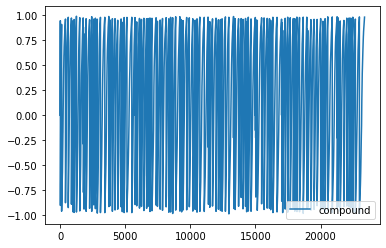

In [42]:
df_plot = df[['month_year', 'compound']]
# y = df['compound']
%matplotlib inline
sns.lineplot( data = df_plot)
plt.show();

In [39]:
# df_before = df[(df['date'] <= "2017-01-19")]
# df_before

In [40]:
# df_after = df[(df['date'] > "2017-01-20")]
# df_after

In [41]:
# df_before2 = df_before['text']
# # df_before2.iloc[0]
# df_after2 = df_after['text']